In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os

path = os.listdir('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Training/')
classes = {'no_tumor':0,'pituitary_tumor':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth='C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])        

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape

(1222, 200, 200)

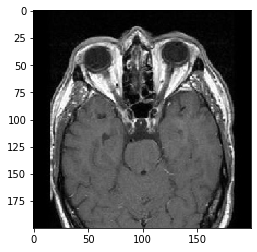

In [8]:
plt.imshow(X[0],cmap='gray')

In [9]:
X_updated = X.reshape(len(X),-1)
X_updated.shape

(1222, 40000)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=0.20)

In [12]:
xtrain.shape

(977, 40000)

In [13]:
xtest.shape

(245, 40000)

In [14]:
#Feature Scaling
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Logistic Regression

In [15]:
#Train Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [16]:
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)
y_pred

c:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(ytest,y_pred))

0.9591836734693877


In [18]:
lr.score(xtrain,ytrain) 

1.0

In [19]:
lr.score(xtest,ytest) #underfitting

0.9591836734693877

Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clfr=DecisionTreeClassifier(random_state=5)
clfr.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=5)

In [22]:
y_pred=clfr.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(ytest,y_pred))

0.9551020408163265


In [24]:
clfr.score(xtrain,ytrain) #overfitting

1.0

In [25]:
clfr.score(xtest,ytest)

0.9551020408163265

Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
sv=SVC(kernel='linear') 
sv.fit(xtrain,ytrain)

SVC(kernel='linear')

In [28]:
y_pred=sv.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [29]:
from sklearn import metrics
print(metrics.accuracy_score(ytest,y_pred))

0.9591836734693877


In [30]:
sv.score(xtrain,ytrain)

1.0

In [31]:
sv.score(xtest,ytest)

0.9591836734693877

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc =  RandomForestClassifier(n_estimators=10,random_state=4)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10, random_state=4)

In [34]:
y_pred=rfc.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1])

In [35]:
from sklearn import metrics 
print(metrics.accuracy_score(ytest,y_pred))

0.9795918367346939


In [36]:
rfc.score(xtrain,ytrain)  #overfitting

0.9989764585465711

In [37]:
rfc.score(xtest,ytest)

0.9795918367346939

Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [40]:
y_pred=gnb.predict(xtest)
print(metrics.accuracy_score(ytest,y_pred))

0.9061224489795918


In [41]:
gnb.score(xtest,ytest)

0.9061224489795918

In [42]:
gnb.score(xtrain,ytrain)

0.917093142272262

K Nearest Neighbor

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(xtrain,ytrain)

KNeighborsClassifier()

In [45]:
y_pred=clf.predict(xtest)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [46]:
print(metrics.accuracy_score(ytest,y_pred))

0.9428571428571428


In [47]:
clf.score(xtrain,ytrain)

0.9488229273285568

In [48]:
clf.score(xtest,ytest)

0.9428571428571428

In [49]:
print(metrics.accuracy_score(ytest,y_pred))

0.9428571428571428


Ensemble Learning

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bc=BaggingClassifier(max_samples=100,bootstrap=True)
bc.fit(xtrain,ytrain)

BaggingClassifier(max_samples=100)

In [52]:
y_pred=bc.predict(xtest)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [53]:
print(metrics.accuracy_score(ytest,y_pred))

0.926530612244898


In [54]:
print(bc.score(xtrain,ytrain))

0.9682702149437052


In [116]:
print(bc.score(xtest,ytest))

0.9591836734693877


In [55]:
dec = {0:'No Tumor',1:'Positive Tumor'}


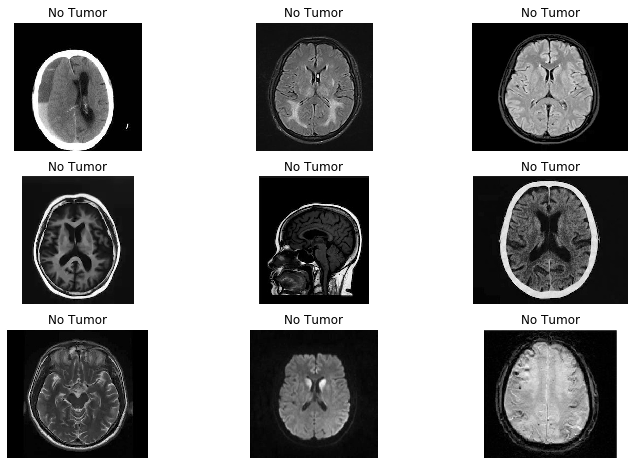

In [56]:
#Testing model
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Testing/')
c=1
for i in os.listdir('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p = rfc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
    
    
    

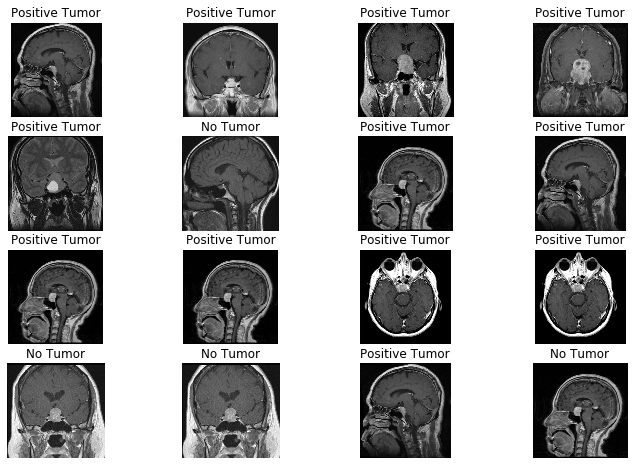

In [57]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Testing/')
c=1
for i in os.listdir('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/User1/OneDrive/Desktop/ML_Brain_Tumor_Prediction/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p = rfc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1